## Example - amazon_alexa

In [1]:
import pandas as pd
import numpy as np

import unicodedata
import re

In [2]:
data = pd.read_csv('data/NLP-amazon_alexa.tsv', delimiter = '\t')
data.head()
# data['variation'].value_counts() # Value Counts for Variation 

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
data['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

## 1. Words Count : Characters, and Punctuation 

In [4]:
# Count the char len
data['char_count'] = data['verified_reviews'].apply(len) 
data['char_count'].head()

# 0     13  Love my Echo!
# 1      9  Loved it! 

0     13
1      9
2    195
3    172
4      5
Name: char_count, dtype: int64

In [5]:
# Count the Sentence Len
data['word_count'] = data['verified_reviews'].apply(lambda x: len(x.split()))
data['word_count'].head() # Word Count(段落)

# 0     3  Love my Echo!
# 1     2  Loved it! 

0     3
1     2
2    38
3    34
4     1
Name: word_count, dtype: int64

In [6]:
# Calculating the Word Density
data['word_density'] = data['char_count'] / (data['word_count']+1)
data['word_density'].head()

0    3.250000
1    3.000000
2    5.000000
3    4.914286
4    2.500000
Name: word_density, dtype: float64

In [7]:
# Calculating the Punctuation Count(, . or and special Punctuation)
import string

punctuation = string.punctuation
data['punctuation_count'] = data['verified_reviews'].apply(
    lambda x:len("".join(_ for _ in x if _ in punctuation))) 
data['punctuation_count'].head()

# 0     1  Love my Echo!
# 1     1  Loved it! 

0    1
1    1
2    3
3    4
4    0
Name: punctuation_count, dtype: int64

## 2.Removing Characters

>Accented characters are important elements which are used to signify emphasis on a particular word during pronunciation or understanding. In some instances, the accent mark also clarifies the meaning of a word, which might be different without the accent. While their use in English is largely limited but there are very good chances that you will come across accented characters/letters in a free text corpus. 

重音字符是重要的元素，用於在發音或理解過程中表示對特定單詞的強調。 在某些情況下，重音標記還可以闡明單詞的含義，如果沒有重音，它可能會有所不同。 雖然它們在英語中的使用在很大程度上受到限制，但您很有可能會在自由文本語料庫中遇到重音字符/字母：Word as résumé, café, prótest, divorcé, coördinate, exposé, latté etc

In [8]:
# Removing Accented Characters 刪除重音字符

def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

data['verified_reviews'] = data.apply(lambda x: remove_accented_chars(x['verified_reviews']), axis = 1)
data['verified_reviews'].head()

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

In [9]:
# Removing Special Characters 刪除特殊字節 (, . )

def remove_special_characters(text):
    pat = r'[^a-zA-z0-9]' 
    return re.sub(pat, ' ', text)
 
data['verified_reviews'] = data.apply(lambda x: remove_special_characters(x['verified_reviews']), axis = 1)
data['verified_reviews'].head()

0                                        Love my Echo 
1                                            Loved it 
2    Sometimes while playing a game  you can answer...
3    I have had a lot of fun with this thing  My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

In [10]:
# remove Punctuations 刪除標點符號

def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

data['verified_reviews'] = data['verified_reviews'].apply(punctuation_removal)
data['verified_reviews'].head()

0                                        Love my Echo 
1                                            Loved it 
2    Sometimes while playing a game  you can answer...
3    I have had a lot of fun with this thing  My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

In [11]:
# remove Numbers 刪除數字
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

data['verified_reviews'] = data['verified_reviews'].apply(drop_numbers)
data['verified_reviews'] .head()

0                                        Love my Echo 
1                                            Loved it 
2    Sometimes while playing a game  you can answer...
3    I have had a lot of fun with this thing  My  y...
4                                                Music
Name: verified_reviews, dtype: object

## 3.Text Polarity (情感分析)

>It is the expression that determines the sentimental aspect of an opinion. In textual data, the result of sentiment analysis can be determined for each entity in the sentence, document or sentence. The sentiment polarity can be determined as positive, negative and neutral.

它是決定意見的情感方面的表達方式。 在文本數據中，可以針對句子、文檔或句子中的每個實體確定情感分析的結果。 情緒極性可以確定為正面、負面和中性。

In [12]:
!pip install textblob

In [13]:
from textblob import TextBlob

def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

data['polarity'] = data['verified_reviews'].apply(get_polarity)
data['polarity'].head()

0    0.50
1    0.70
2   -0.10
3    0.35
4    0.00
Name: polarity, dtype: float64

### Text Subjectivity 文本主觀性

>In natural language, subjectivity refers to expression of opinions, evaluations, feelings, and speculations and thus incorporates sentiment. Subjective text is further classified with sentiment or polarity.

在自然語言中，主觀性是指意見、評價、感受和推測的表達，因此包含了情感。 主觀文本進一步分類為情感或極性。

In [14]:
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

data['subjectivity'] = data['verified_reviews'].apply(get_subjectivity)
data['subjectivity'].head()

0    0.6000
1    0.8000
2    0.5125
3    0.4500
4    0.0000
Name: subjectivity, dtype: float64

### Summarize

In [15]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data[['polarity','subjectivity']].describe()

,polarity,subjectivity
count,3150.000000,3150.000000
mean,0.333889,0.531413
std,0.282654,0.256219
min,-1.000000,0.000000
25%,0.120982,0.425000
50%,0.348131,0.589435
75%,0.500000,0.695579
max,1.000000,1.000000


C:\Users\cti110016\AppData\Local\Temp\ipykernel_15608\284329842.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['polarity'])
C:\Users\cti110016\AppData\Local\Temp\ipykernel_15608\284329842.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['subjectivity'])


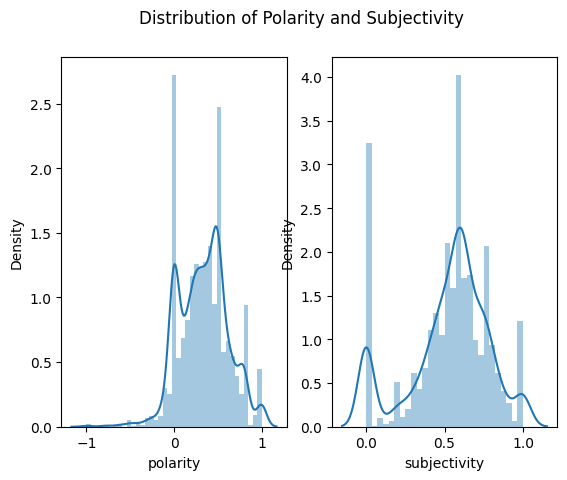

In [17]:
## Visualizing Polarity and Subjectivity

plt.subplot(1, 2, 1)
sns.distplot(data['polarity'])

plt.subplot(1, 2, 2)
sns.distplot(data['subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

## 4. Stopwords 停用詞

>Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.

停用詞是任何語言中的一組常用詞。 例如，在英語中，“the”、“is”和“and”很容易成為停用詞。 在 NLP 和文本挖掘應用程序中，停用詞用於消除不重要的詞，從而允許應用程序專注於重要的詞。

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
# Remove the Stopwords with (import stopwords)

stop_words = []
text = "Nick likes to play football, however he is not too fond of tennis."
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
tokens_without_sw

['Nick', 'likes', 'play', 'football', ',', 'however', 'fond', 'tennis', '.']

In [20]:
!pip install gensim

                                              0.0/24.0 MB ? eta -:--:--
                                              0.0/24.0 MB 1.3 MB/s eta 0:00:19
                                              0.1/24.0 MB 1.3 MB/s eta 0:00:19
                                              0.2/24.0 MB 1.6 MB/s eta 0:00:15
                                              0.4/24.0 MB 2.1 MB/s eta 0:00:12
                                              0.6/24.0 MB 2.5 MB/s eta 0:00:10
     -                                        0.8/24.0 MB 3.0 MB/s eta 0:00:08
     --                                       1.3/24.0 MB 4.2 MB/s eta 0:00:06
     ---                                      2.0/24.0 MB 5.3 MB/s eta 0:00:05
     ----                                     2.9/24.0 MB 6.9 MB/s eta 0:00:04
     --------                                 5.2/24.0 MB 11.0 MB/s eta 0:00:02
     -------------                            8.0/24.0 MB 15.6 MB/s eta 0:00:02
     -------------                            8.0/24.0 MB

In [21]:
from gensim.parsing.preprocessing import remove_stopwords

In [22]:
# Remove the Stopwords with (import gensim)

text = "Nick likes to play football, however he is not too fond of tennis."
filtered_sentence = remove_stopwords(text)
filtered_sentence

'Nick likes play football, fond tennis.'

## 5.Visualizing_Frequent

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)

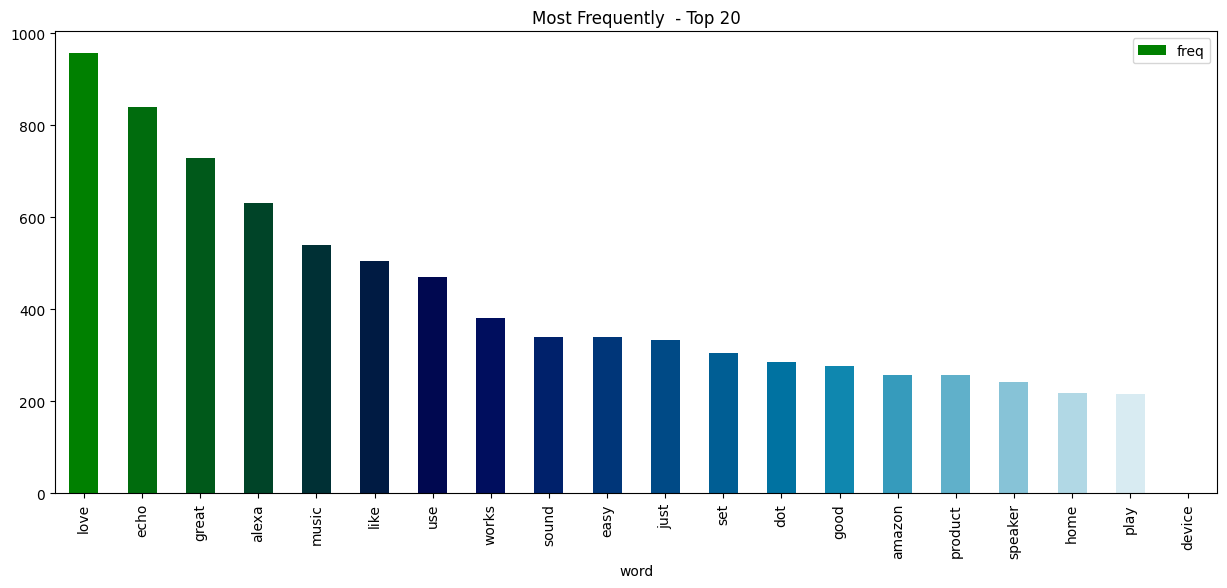

In [24]:
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)  #Head = Most
plt.title("Most Frequently  - Top 20")
plt.show()

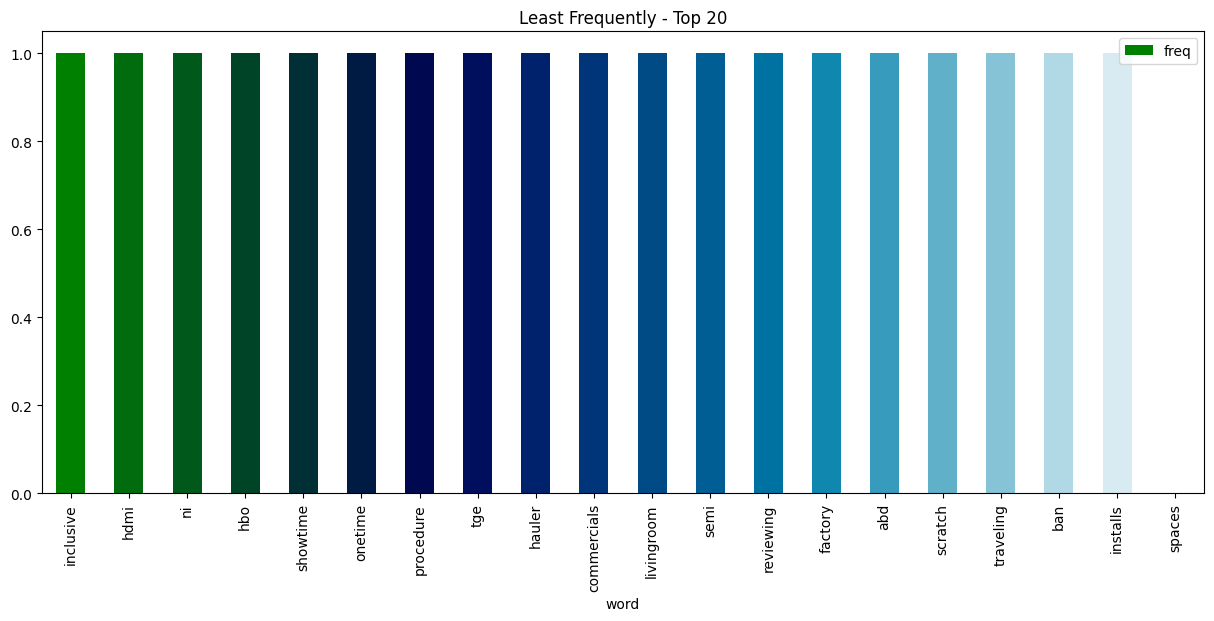

In [25]:
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)  #tail = Least
plt.title("Least Frequently - Top 20")
plt.show()

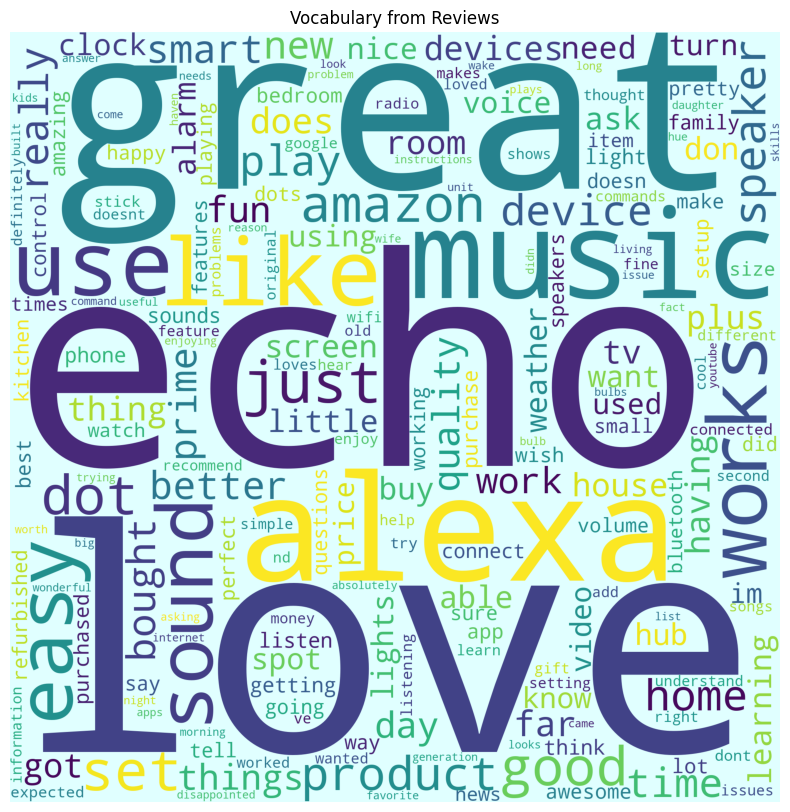

In [26]:
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews")
plt.show()

## 5.Concept of N Grams 
>In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus.

N-gram 是一個入門常見語言模型。利用 N-gram 實作一個模型，能夠像似搜尋引擎根據使用者的輸入推薦相關的字詞。N-gram 是來自給定文本或語音樣本的 n 個項目的連續序列。這些項目可以是音素、音節、字母、單詞。 n-gram 通常是從文本或語音語料庫中收集的。

## Predict : NGrams_TF_IDF


## NLTK 

NLTK (aka Natural Language ToolKit，也就是自然語言工具箱），是2001年就持續更新的一個強大NLP Python libraryD。我們會使用Penn Treebank文集(the Penn Treebank Corpus)以及Brown文集(the Brown Corpus)。其中Penn Treebank中搜集了許多華爾街日報的文章(Wall Street Journal)，而Brown中多數的文字和文學有關。在以下這格中我們下載Penn Treebank以及Brown這兩個文集，並且測試了這兩個文集中的第一個句子。

In [27]:
import nltk

from nltk.corpus import treebank, brown
nltk.download('treebank')
nltk.download('brown')

# ".tagged_sents()"提取了詞性標註過的句子(sents = sentences)
print(treebank.tagged_sents()[0])
print(brown.tagged_sents()[0])

# universal_tagset 標註方法
# nltk.download('universal_tagset')
# print(treebank.tagged_sents(tagset="universal")[0])
# print(brown.tagged_sents(tagset="universal")[0])

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\cti110016\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\cti110016\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]
[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')]


In [28]:
from collections import defaultdict

POS_dict = defaultdict(dict)
for word_pos_pair in treebank.tagged_words():
    word = word_pos_pair[0].lower() # 正規化成小寫
    POS = word_pos_pair[1]
    POS_dict[word][POS] = POS_dict[word].get(POS,0) + 1

In [29]:
# 取一些字來看看他們怎麼表現多個詞性標註，以及每個詞性在文集中的分布狀況：

for word in list(POS_dict.keys())[900:1000]:
    if len(POS_dict[word]) > 1:
        print(word)
        print(POS_dict[word])

target
{'NN': 8, 'VB': 2}
forecast
{'NN': 4, 'VBP': 1, 'VBD': 1, 'VBN': 1}
recorded
{'VBN': 1, 'VBD': 1}
4
{'CD': 15, 'LS': 1}
keep
{'VB': 15, 'VBP': 1}
pace
{'NN': 6, 'NNP': 1}
rival
{'JJ': 1, 'NN': 4}
announced
{'VBD': 14, 'VBN': 3}
advertising
{'NN': 10, 'VBG': 3}
plan
{'NN': 45, 'NNP': 2, 'VB': 1, 'VBP': 2}
ad
{'NN': 28, 'NNP': 1}
post
{'NNP': 1, 'VB': 2, 'NN': 4}
second
{'JJ': 16, 'NNP': 2}
offered
{'VBN': 11, 'VBD': 16}
plans
{'NNS': 17, 'VBZ': 18, 'VBP': 1}
give
{'VBP': 6, 'VB': 15}
spending
{'NN': 25, 'VBG': 2}
become
{'VBN': 7, 'VB': 15, 'VBP': 1}
news
{'NN': 24, 'NNP': 6}
world
{'NNP': 13, 'NN': 24}
5
{'CD': 18, 'LS': 1}
cost
{'VB': 4, 'NN': 12}
lowered
{'VBD': 2, 'VBN': 2}
circulation
{'NN': 10, 'NNP': 1}
lower
{'JJR': 30, 'RBR': 1}
costs
{'VBZ': 4, 'NNS': 22}
yet
{'RB': 17, 'CC': 6}
credit
{'NNP': 2, 'NN': 22}
meet
{'VBP': 3, 'VB': 9}
exceed
{'VBP': 1, 'VB': 3}
long
{'RB': 11, 'JJ': 16, 'NNP': 1}
spent
{'VBD': 4, 'VBN': 4}
attempt
{'NN': 8, 'VB': 2}
decline
{'NN': 14, 'VBP'

In [30]:
# 為了開發出我們的第一個標註器(Unigram Tagger)，我們只需要為每個詞選出最常見的詞性。
# 不是每一個字都是我們在training set中看過的字，所以沒看過的字會自動標註成名詞"NN"。

tagger_dict = {}
for word in POS_dict:
    tagger_dict[word] = max(POS_dict[word],key=lambda x: POS_dict[word][x])

def tag(sentence):
    return [(word,tagger_dict.get(word,"NN")) for word in sentence]

example_sentence = """You better start swimming or sink like a stone , cause the times they are a - changing .""".split() 
print(tag(example_sentence))

[('You', 'NN'), ('better', 'JJR'), ('start', 'VB'), ('swimming', 'NN'), ('or', 'CC'), ('sink', 'VB'), ('like', 'IN'), ('a', 'DT'), ('stone', 'NN'), (',', ','), ('cause', 'NN'), ('the', 'DT'), ('times', 'NNS'), ('they', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('-', ':'), ('changing', 'VBG'), ('.', '.')]


In [31]:
# 訓練集:測試集 = 9:1

size = int(len(treebank.tagged_sents()) * 0.9)
train_sents = treebank.tagged_sents()[:size] 
test_sents = treebank.tagged_sents()[size:]

In [32]:
# 我們先來比對預設的Unigram和Bigram Tagger。
# NLTK裡面所有的標註器都有評價功能，藉此回傳訓練模型的準確率(accuracy)。

from nltk import UnigramTagger, BigramTagger

unigram_tagger = UnigramTagger(train_sents)
bigram_tagger = BigramTagger(train_sents)
print(unigram_tagger.evaluate(test_sents))
print(unigram_tagger.tag(example_sentence))
print(bigram_tagger.evaluate(test_sents))
print(bigram_tagger.tag(example_sentence))

C:\Users\cti110016\AppData\Local\Temp\ipykernel_15608\3083767431.py:8: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print(unigram_tagger.evaluate(test_sents))
C:\Users\cti110016\AppData\Local\Temp\ipykernel_15608\3083767431.py:10: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print(bigram_tagger.evaluate(test_sents))


0.8627989821882952
[('You', 'PRP'), ('better', 'JJR'), ('start', 'VB'), ('swimming', None), ('or', 'CC'), ('sink', 'VB'), ('like', 'IN'), ('a', 'DT'), ('stone', 'NN'), (',', ','), ('cause', 'NN'), ('the', 'DT'), ('times', 'NNS'), ('they', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('-', ':'), ('changing', 'VBG'), ('.', '.')]
0.13455470737913486
[('You', 'PRP'), ('better', None), ('start', None), ('swimming', None), ('or', None), ('sink', None), ('like', None), ('a', None), ('stone', None), (',', None), ('cause', None), ('the', None), ('times', None), ('they', None), ('are', None), ('a', None), ('-', None), ('changing', None), ('.', None)]


在這裡Unigram Tagger的效果好太多了。原因很明顯，因為Bigram Tagger並沒有足夠的資料來觀察前後文的關係，更糟的是，一旦一個詞的詞性判斷被判定成"None"，後面整句話也都會失敗。為了解決問題，我們需要為Bigram Tagger加上退避(backoffs)，先預設那些"None"的字為"NN"！

In [33]:
from nltk import DefaultTagger

default_tagger = DefaultTagger("NN")
unigram_tagger = UnigramTagger(train_sents,backoff=default_tagger)
bigram_tagger = BigramTagger(train_sents,backoff=unigram_tagger)

print(bigram_tagger.evaluate(test_sents))
print(bigram_tagger.tag(example_sentence))

0.8905852417302799
[('You', 'PRP'), ('better', 'JJR'), ('start', 'VB'), ('swimming', 'NN'), ('or', 'CC'), ('sink', 'VB'), ('like', 'IN'), ('a', 'DT'), ('stone', 'NN'), (',', ','), ('cause', 'VB'), ('the', 'DT'), ('times', 'NNS'), ('they', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('-', ':'), ('changing', 'VBG'), ('.', '.')]


C:\Users\cti110016\AppData\Local\Temp\ipykernel_15608\296420867.py:7: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print(bigram_tagger.evaluate(test_sents))


參考資源

https://github.com/nltk/nltk/wiki/Installing-Third-Party-Software#stanford-tagger-ner-tokenizer-and-parser

中文
https://medium.com/pyladies-taiwan/nltk-%E5%88%9D%E5%AD%B8%E6%8C%87%E5%8D%97-%E4%B8%80-%E7%B0%A1%E5%96%AE%E6%98%93%E4%B8%8A%E6%89%8B%E7%9A%84%E8%87%AA%E7%84%B6%E8%AA%9E%E8%A8%80%E5%B7%A5%E5%85%B7%E7%AE%B1-%E6%8E%A2%E7%B4%A2%E7%AF%87-2010fd7c7540

https://www.796t.com/p/436065.html